<center><b>PERTEMUAN 6<br>
    Machine Learning berbasis Algoritma Tree <br><br></b></center>

Nama : Siti Khotimatul Wildahh<br>
NIM  : G6601231010

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
data_root = '/content/drive/My Drive/Colab Notebooks/'

<b>1.	Decision Tree</b>

In [30]:
#Import Library
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


#Melakukan pembacaaan dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("/content/drive/My Drive/Colab Notebooks/pima-indians-diabetes.csv", header=None, names=col_names)
#print(pima) ere

#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
x = pima[feature_cols] # Features
y = pima.label # Target variable


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)


    # Membuat objek DT
     # Dapat dioptimalkan dengan menghitung Entropy
clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)


# Melakukan Pelatihan DT
clf = clf.fit(X_train,y_train)

# Memprediksi
y_pred = clf.predict(X_test)

# Menghitung akurasi model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.671875


<b>2.	CART (Classification And Regression Tree)</b>

In [31]:
import numpy as np
import pandas as pd

# Load Boston housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_target = raw_df.values[1::2, 2]

# Create a DataFrame
boston = pd.DataFrame(data=boston_data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
boston['MEDV'] = boston_target
names = boston.columns[:-1]  # Feature names

# Display the first few rows of the DataFrame
print(boston.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [33]:
#Library CART pada python
from sklearn.tree import DecisionTreeRegressor


In [34]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load your Boston dataset (assuming you have loaded it)

# Assuming you have loaded your dataset into the 'boston' DataFrame
# Replace this with your actual data loading mechanism

# Assume 'boston' DataFrame contains your data

array = boston.values

X = array[:, 0:13]
Y = array[:, 13]

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

# Define your model
model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=None, max_features=None,
                              max_leaf_nodes=50, min_samples_leaf=1,
                              min_samples_split=2, min_weight_fraction_leaf=0.0,
                              random_state=None, splitter='best')

# Fit the model
model.fit(X_train, Y_train)

# Make a prediction
YHat = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(Y_test, YHat)
print("R-Squared =", r2)


R-Squared = 0.8542049562096199


<b>3.	Bagging  </b>

In [35]:
#Impor Library
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV


#Load cancer dataset
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target


#membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)


#Melakukan pipelining
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))


#Skema bagging
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=8,
                                 max_samples=80,
                                 random_state=1, n_jobs=5)

bgclassifier.fit(X_train, y_train)

print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model test Score: 0.958,  Model training Score: 0.960


<b>Tugas Praktikum</b><br>

1. Melakukan Visualisasi Tree<br>
a. Decision Tree

Accuracy: 0.671875


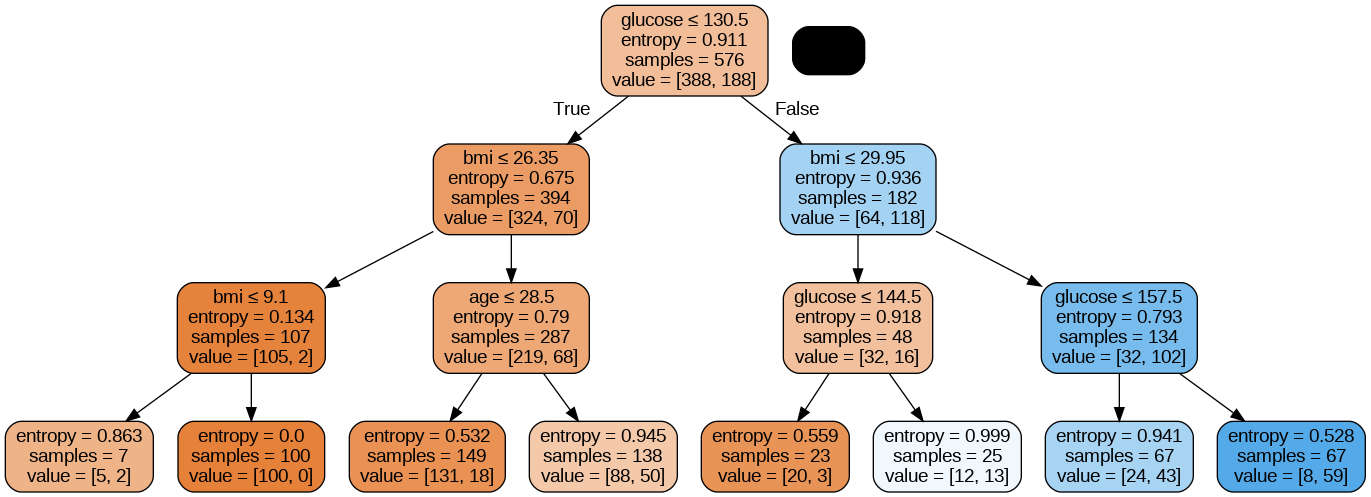

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Definisikan column names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Load dataset
pima = pd.read_csv("/content/drive/My Drive/Colab Notebooks/pima-indians-diabetes.csv", header=None, names=col_names)

# Split dataset menjadi fitur (X) dan variabel target (y)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]  # Fitur
y = pima.label  # Variabel target

# Split data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

# Buat objek Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Latih model Decision Tree
clf = clf.fit(X_train, y_train)

# Memprediksi
y_pred = clf.predict(X_test)

# Menghitung akurasi model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualisasikan pohon keputusan
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_cols,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


1. Melakukan Visualisasi Tree<br>
b. CART


In [20]:
import numpy as np
import pandas as pd

# Load Boston housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_target = raw_df.values[1::2, 2]

# Create a DataFrame
boston = pd.DataFrame(data=boston_data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
boston['MEDV'] = boston_target
names = boston.columns[:-1]  # Feature names

# Display the first few rows of the DataFrame
print(boston.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load your Boston dataset (assuming you have loaded it)

# Assuming you have loaded your dataset into the 'boston' DataFrame
# Replace this with your actual data loading mechanism

# Assume 'boston' DataFrame contains your data

array = boston.values

X = array[:, 0:13]
Y = array[:, 13]

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

# Define your model
model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=None, max_features=None,
                              max_leaf_nodes=50, min_samples_leaf=1,
                              min_samples_split=2, min_weight_fraction_leaf=0.0,
                              random_state=None, splitter='best')

# Fit the model
model.fit(X_train, Y_train)

# Make a prediction
YHat = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(Y_test, YHat)
print("R-Squared =", r2)

# Rest of your code...


R-Squared = 0.8259181617919062


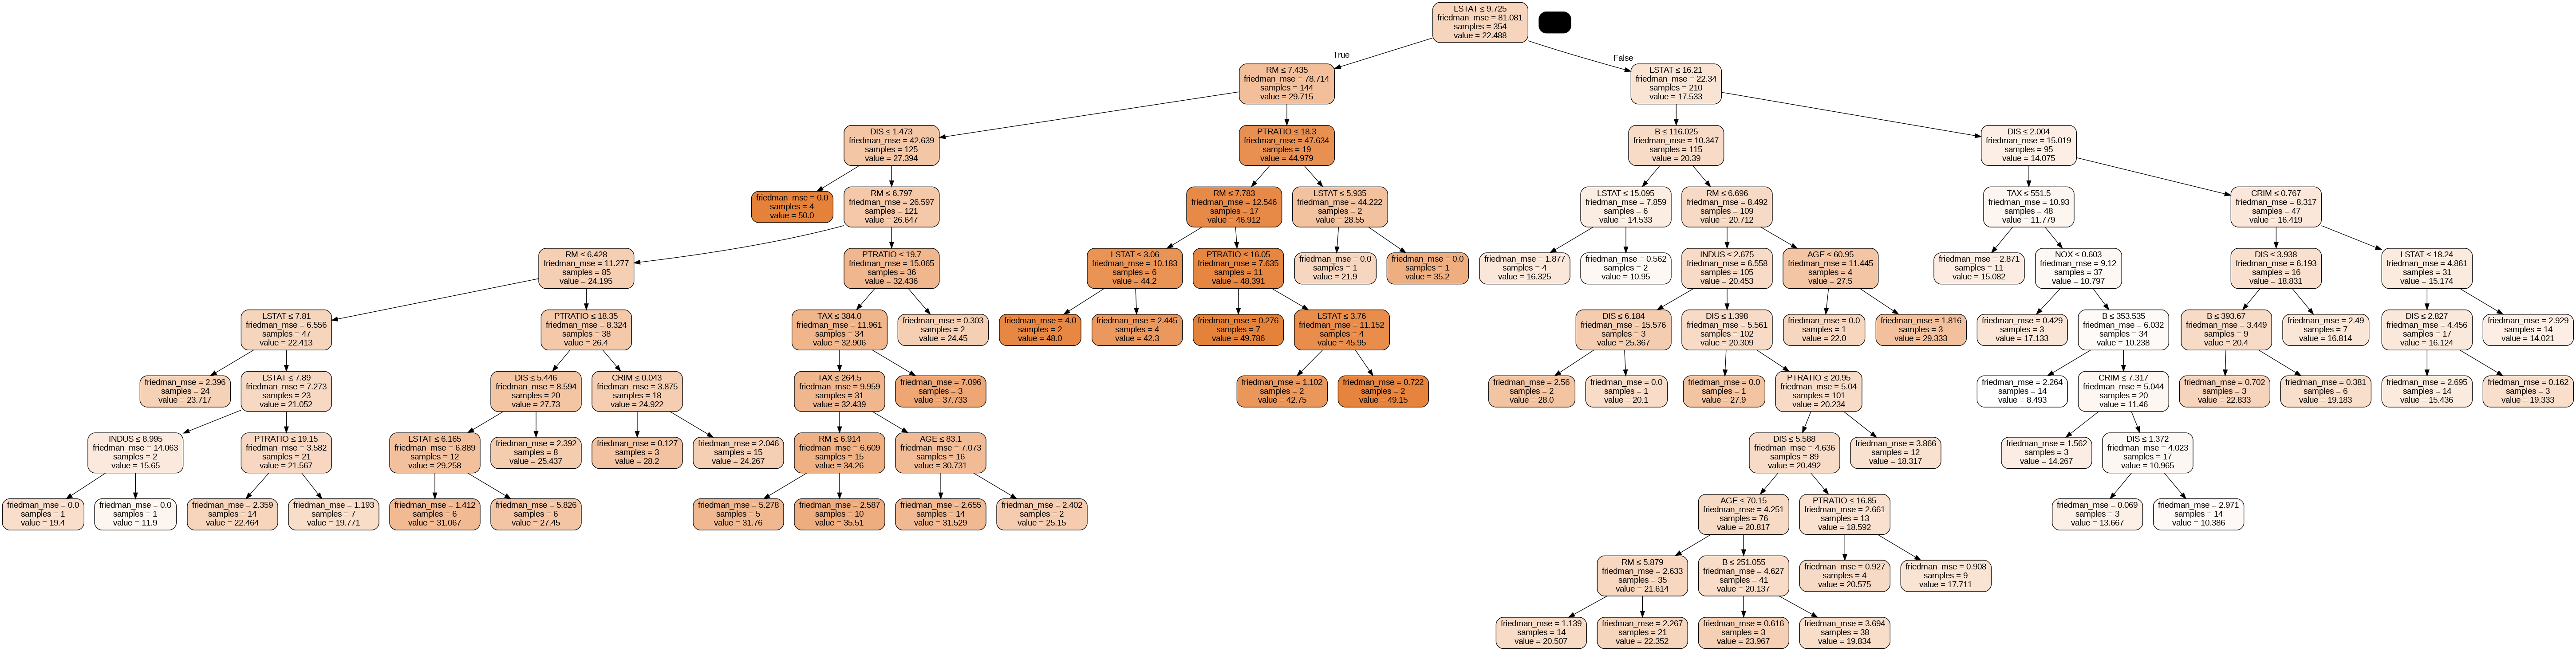

In [23]:
import pydotplus
from IPython.display import Image

# Rest of your code...

# Visualize the decision tree
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=names,  # Use feature names from the DataFrame
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


2.	Melakukan tanpa skema bagging <br>
a.	Pada Bagging


In [37]:
# Impor Library
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Load cancer dataset
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

# Melakukan pipelining
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))

# Melatih model Logistic Regression
pipeline.fit(X_train, y_train)

print('Model test Score: %.3f, ' % pipeline.score(X_test, y_test),
      'Model training Score: %.3f' % pipeline.score(X_train, y_train))


Model test Score: 0.965,  Model training Score: 0.991
